# Importing & reading csv files

In [1]:
import pandas as pd
dfr = pd.read_csv('bus_ridership.csv', keep_default_na=False, na_values=[""])
dfr.head()

,txn_type,txn_date,txn_time,start_location,end_location,route_name,start_zone,end_zone,loading_date,ingestion_id
0,Check in,2017-01-06,18:18:17,Arabian Orchard Complex A 1,Arabian Orchard Complex A 1,F46,Zone 1,Zone 1,20170718,1603
1,Check in,2017-01-06,13:15:33,"Ibn Battuta, Food Court 3","Ibn Battuta, Food Court 3",F42,Zone 2,Zone 2,20170718,1603
2,Check in,2017-01-06,20:04:59,"Ibn Battuta, Food Court 3","Ibn Battuta, Food Court 3",F43,Zone 2,Zone 2,20170718,1603
3,Check in,2017-01-06,20:57:56,"Ibn Battuta, Food Court 3","Ibn Battuta, Food Court 3",F43,Zone 2,Zone 2,20170718,1603
4,Check in,2017-01-06,14:02:17,"Ibn Battuta, Food Court 3","Ibn Battuta, Food Court 3",F46,Zone 2,Zone 2,20170718,1603


In [2]:
dfr.shape

(656149, 10)

# Empty values

In [3]:
dfr.notnull().sum()

txn_type          656149
txn_date          656149
txn_time          656149
start_location    274342
end_location      656149
route_name        656149
start_zone        656149
end_zone          656149
loading_date      656149
ingestion_id      656149
dtype: int64

In [4]:
dfr.isnull().sum()

txn_type               0
txn_date               0
txn_time               0
start_location    381807
end_location           0
route_name             0
start_zone             0
end_zone               0
loading_date           0
ingestion_id           0
dtype: int64

# Column summary & types

In [5]:
dfr.dtypes

txn_type          object
txn_date          object
txn_time          object
start_location    object
end_location      object
route_name        object
start_zone        object
end_zone          object
loading_date       int64
ingestion_id       int64
dtype: object

In [6]:
#filter dataframe by rows containing 'BurJuman'
dfr_bj = dfr[dfr['end_location'].str.contains("BurJuman")]
dfr_bj.shape

(6721, 10)

In [7]:
dfr['end_location'].nunique()

2115

# Converting txn_time column to hour format

In [8]:
dfr['txn_time']=pd.to_datetime(dfr.txn_time)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#convert the txn_time column to a single hour format 
dfr['hour']=dfr.txn_time.dt.hour

In [11]:
# Write DataFrame to CSV
dfr.to_csv('out.csv')

In [12]:
dfr.dtypes

txn_type                  object
txn_date                  object
txn_time          datetime64[ns]
start_location            object
end_location              object
route_name                object
start_zone                object
end_zone                  object
loading_date               int64
ingestion_id               int64
hour                       int64
dtype: object

In [13]:
# filter Metro Bus stops for visualisation 

In [14]:
dfr_metrobusstop = dfr[dfr['end_location'].str.contains("Metro")]

In [15]:
dfr_metrobusstop.to_csv('metrobusstop.csv')

In [16]:
metrobusstop = pd.read_csv('metrobusstop.csv', keep_default_na=False, na_values=[""])
metrobusstop.head()

,Unnamed: 0,txn_type,txn_date,txn_time,start_location,end_location,route_name,start_zone,end_zone,loading_date,ingestion_id,hour
0,341,Check in,2017-01-06,2018-08-14 23:14:25,Business Bay Metro Station Seaside,Business Bay Metro Station Seaside,7,Zone 6,Zone 6,20170718,1603,23
1,342,Check in,2017-01-06,2018-08-14 10:54:58,Business Bay Metro Station Seaside,Business Bay Metro Station Seaside,F20,Zone 6,Zone 6,20170718,1603,10
2,343,Check in,2017-01-06,2018-08-14 21:42:25,Business Bay Metro Station Seaside,Business Bay Metro Station Seaside,7,Zone 6,Zone 6,20170718,1603,21
3,905,Check in,2017-01-06,2018-08-14 18:51:39,Rashidiya Metro Station 3,Rashidiya Metro Station 3,365,Zone 5,Zone 5,20170718,1603,18
4,906,Check in,2017-01-06,2018-08-14 07:31:10,Rashidiya Metro Station 3,Rashidiya Metro Station 3,365,Zone 5,Zone 5,20170718,1603,7


In [17]:
metrobusstop.shape

(116446, 12)

In [24]:
metrobusstop.groupby(['hour','end_location']).size().unstack(fill_value=0).to_csv('Metrobusstopmatrix.csv')

In [25]:
metrobusstop.to_csv('metrobusstopmatrix.csv')

# Counts of ridership for each hour (total)

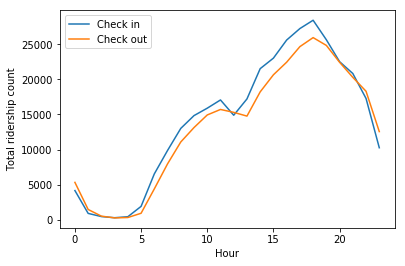

In [26]:
#filter Check in 
dfr_ci = dfr[dfr['txn_type'].str.contains("Check in")]

#filter Check out
dfr_co = dfr[dfr['txn_type'].str.contains("Check out")]

#Count & plot the number of rides per hour & sort in ascending order 

Check_in = dfr_ci.hour.value_counts().sort_index().plot(label = 'Check in')
Check_out = dfr_co.hour.value_counts().sort_index().plot(label = 'Check out')
plt.ylabel('Total ridership count')
plt.xlabel('Hour')
Check_in.legend();

Text(0.5,0,'Hour and bus stop')

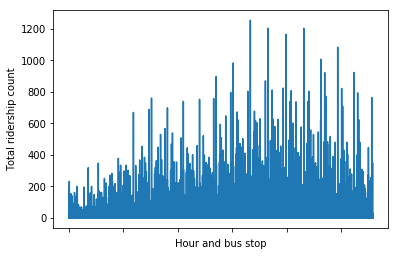

In [27]:
dfr.groupby('hour').end_location.value_counts().sort_index().plot()
plt.ylabel('Total ridership count')
plt.xlabel('Hour and bus stop')

In [28]:
#dfr.groupby(['hour','end_location']).size().unstack(fill_value=0)

# Counts of ridership for each hour (Burjuman Stations)

In [29]:
#filter dataframe by rows containing 'BurJuman'
dfr_bj = dfr[dfr['end_location'].str.contains("BurJuman")]
#number of rows with data
dfr_bj.shape

(6721, 11)

In [30]:
#Number of end_location (station name) entries
dfr_bj['end_location'].nunique()

7

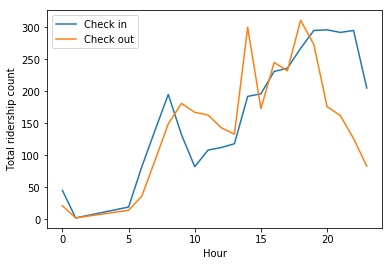

In [31]:
#filter Check in 
dfr_bj_ci = dfr_bj[dfr_bj['txn_type'].str.contains("Check in")]

#filter Check out
dfr_bj_co = dfr_bj[dfr_bj['txn_type'].str.contains("Check out")]

#Count & plot the number of rides per hour & sort in ascending order 

Check_in = dfr_bj_ci.hour.value_counts().sort_index().plot(label = 'Check in')
Check_out = dfr_bj_co.hour.value_counts().sort_index().plot(label = 'Check out')
#dfr_co.hour.plot(hour,hour.value_counts().sort_index(), label = "Check out")
plt.ylabel('Total ridership count')
plt.xlabel('Hour')
Check_in.legend();
#plt.xlabel('Total ridership for Check-in vs Check-out')

# Bus Ridership for a week

In [32]:
dfr2 = dfr
dfr2.shape
#there is an extra column accounting for the new 'Hour' that was addded previously

(656149, 11)

In [33]:
dfr1 = pd.read_csv('bus_ridership_day1.csv', keep_default_na=False, na_values=[""])
dfr1.shape

(763667, 8)

In [34]:
dfr1.notnull().sum()

txn_type          763667
txn_date          763667
txn_time          763667
start_location    305775
end_location      763667
route_name        763667
start_zone        763667
end_zone          763667
dtype: int64

In [35]:
dfr3 = pd.read_csv('bus_ridership_day3.csv', keep_default_na=False, na_values=[""])
dfr3.shape

(656149, 8)

In [36]:
import statistics

#avg_rid = (dfr1.txn_type.value_counts(),dfr2.txn_type.value_counts(), dfr3.txn_type.value_counts()).mean()
total_rows1 = int(dfr1.txn_date.value_counts())
total_rows2 = int(dfr2.txn_date.value_counts())
total_rows3 = int(dfr3.txn_date.value_counts())

avg_rid = statistics.mean([total_rows1, total_rows2, total_rows3])

#average number of ridership from 3 ridership datasets
avg_rid

691988.3333333334